<a href="https://colab.research.google.com/github/crlsyajie/Google/blob/main/Multimodal_Embedding_DEMO_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multimodal Embeddings with Vertex AI
### By Joan Santoso


This module focuses on creating combined text and image embeddings using Google Cloud's Vertex AI platform. Unlike the Gemini API, which offers the general-purpose gemini-embedding-001, Vertex AI provides the specialized multimodalembedding@001 model for inputs that include images, text, and video. A multimodal embedding allows you to query images using text, and vice-versa, because all modalities are mapped to the same 1408-dimensional vector space.

To use the Vertex AI SDK, you must have an active Google Cloud project and handle authentication. You need the google-cloud-aiplatform library.

In [ ]:
!pip install google-cloud-aiplatform pillow

Ensure the Vertex AI API is enabled for your Google Cloud Project.


In [ ]:
PROJECT_ID="adk-examples-478303"
PROJECT_LOCATION="us-central1"

In [ ]:
!gcloud config set project {PROJECT_ID}

Updated property [core/project].


In [ ]:
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=1AQO98AEK0kW1QJrhmUs5DrRHhbjY7&prompt=consent&token_usage=remote&access_type=offline&code_challenge=03V_bIdymEh_l9N56Uul8XDM6yzod837OTOmXhG8HjI&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0Ab32j90RfFjaQU9GlcwiGrLgVwTluyfQn-QfU2CvpmfpSszXUwTH9GoZGyhzfgxaz5r1Xg

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Q

In [ ]:
!gcloud auth application-default set-quota-project {PROJECT_ID}


Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "adk-examples-478303" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project owning the resource.


We will use the MultiModalEmbeddingModel class and load an image from a local storage for a runnable example.

In [ ]:
import os
import vertexai
from vertexai.vision_models import Image, MultiModalEmbeddingModel, Video

/usr/local/lib/python3.12/dist-packages/google/cloud/aiplatform/models.py:52: FutureWarning: Support for google-cloud-storage < 3.0.0 will be removed in a future version of google-cloud-aiplatform. Please upgrade to google-cloud-storage >= 3.0.0.
  from google.cloud.aiplatform.utils import gcs_utils


In [ ]:
vertexai.init(project=PROJECT_ID, location=PROJECT_LOCATION)
print("Vertex AI client initialized.")

Vertex AI client initialized.


After the API is successfully enabled, please try running the cell to load the `MultiModalEmbeddingModel`.

In [ ]:
OUTPUT_DIMENSION = 1408
from vertexai.vision_models import MultiModalEmbeddingModel
model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding")

/usr/local/lib/python3.12/dist-packages/vertexai/_model_garden/_model_garden_models.py:278: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()


In [ ]:
from google.colab import files
uploaded = files.upload()
FILE_NAME = ""
for fn in uploaded.keys():
  FILE_NAME = fn
print("File Name : ", FILE_NAME)

Saving 9bad12c9-33e3-4430-8353-e38ab490df6c.jpg to 9bad12c9-33e3-4430-8353-e38ab490df6c.jpg
File Name :  9bad12c9-33e3-4430-8353-e38ab490df6c.jpg


In [ ]:
from vertexai.vision_models import Image
image = Image.load_from_file(FILE_NAME)
CONTEXTUAL_TEXT = input("Add some contextual text for this image :")

/usr/local/lib/python3.12/dist-packages/vertexai/vision_models/_vision_models.py:154: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()


Add some contextual text for this image :create a paris background for the image


The previous code cell was setting up the image and prompting for contextual text. Let's break it down:

*   `from vertexai.vision_models import Image`: This line imports the `Image` class from the `vertexai.vision_models` module, which is necessary to work with image data using Vertex AI.
*   `image = Image.load_from_file(FILE_NAME)`: This line loads an image from the file specified by the `FILE_NAME` variable (which currently holds `'1760489330766 (5).jpg'`). The `Image.load_from_file()` method reads the image content and creates a `vertexai.vision_models.Image` object.
*   `CONTEXTUAL_TEXT = input("Add some contextual text for this image :")`: This line prompts the user to input descriptive text for the image. The entered text is then stored in the `CONTEXTUAL_TEXT` variable. This input is crucial for the multimodal embedding model, as it allows for generating embeddings that combine both the visual and textual context.

In [ ]:
embeddings_response = model.get_embeddings(
        image=image,
        contextual_text=CONTEXTUAL_TEXT,
        dimension=OUTPUT_DIMENSION,
)

The previous code cell is where the multimodal embedding is actually generated:

*   `embeddings_response = model.get_embeddings()`: This line calls the `get_embeddings` method of the `model` object (which is an instance of `MultiModalEmbeddingModel`). This method is responsible for taking the input modalities (image and text in this case) and generating their corresponding embeddings.
*   `image=image,`: Here, the `image` object (loaded from `FILE_NAME` in the previous step) is passed as the visual input to the model.
*   `contextual_text=CONTEXTUAL_TEXT,`: The `CONTEXTUAL_TEXT` (provided by the user) is passed as the textual input. The model uses both to create a unified embedding.
*   `dimension=OUTPUT_DIMENSION,`: This parameter specifies the desired dimensionality of the output embeddings. `OUTPUT_DIMENSION` is set to `1408`, meaning the model will produce 1408-dimensional vectors for both the text and image embeddings. This standardized dimension allows for easy comparison and search between different modalities.

In [ ]:
text_embedding = embeddings_response.text_embedding
print("\n--- Text Embedding Result ---")
print(f"Text: '{CONTEXTUAL_TEXT}'")
print(f"Dimensionality: {len(text_embedding)}")
print(f"First 10 values: {text_embedding[:10]}")


--- Text Embedding Result ---
Text: 'create a paris background for the image'
Dimensionality: 1408
First 10 values: [0.0140247773, -0.00583578739, 0.0189688914, 0.0432560518, -0.0241170432, 0.0176680069, -0.0271616392, -0.0163121391, -0.000318259728, -0.0324791856]


This code cell extracts and displays the text embedding result:

*   `text_embedding = embeddings_response.text_embedding`: After `get_embeddings` is called, the `embeddings_response` object contains the generated embeddings. This line specifically extracts the text embedding from the response.
*   `print("\n--- Text Embedding Result ---")`: Prints a header for clarity.
*   `print(f"Text: '{CONTEXTUAL_TEXT}'")`: Displays the original contextual text that was used to generate this embedding.
*   `print(f"Dimensionality: {len(text_embedding)}")`: Shows the length of the `text_embedding` list, confirming its dimensionality (which should be `OUTPUT_DIMENSION`, or 1408).
*   `print(f"First 10 values: {text_embedding[:10]}")`: Prints the first 10 floating-point values of the text embedding. This gives a partial view of the high-dimensional vector that represents the meaning of the input text.

In [ ]:
image_embedding = embeddings_response.image_embedding
print("\n--- Image Embedding Result ---")
print(f"Image URI: {FILE_NAME}")
print(f"Dimensionality: {len(image_embedding)}")
print(f"First 10 values: {image_embedding[:10]}")



--- Image Embedding Result ---
Image URI: 9bad12c9-33e3-4430-8353-e38ab490df6c.jpg
Dimensionality: 1408
First 10 values: [-0.0197066683, 0.0727948099, -0.0388040543, 0.0224669129, 0.0264825355, -0.0493035801, 0.0051882579, 0.0130287018, -0.0131769562, 0.0443863496]


This code cell is similar to the previous one, but it focuses on the image embedding:

*   `image_embedding = embeddings_response.image_embedding`: This line extracts the image embedding from the `embeddings_response` object.
*   `print("\n--- Image Embedding Result ---")`: Prints a header for clarity.
*   `print(f"Image URI: {FILE_NAME}")`: Displays the filename of the image that was embedded.
*   `print(f"Dimensionality: {len(image_embedding)}")`: Shows the length of the `image_embedding` list, confirming its dimensionality (also 1408, matching the `OUTPUT_DIMENSION`).
*   `print(f"First 10 values: {image_embedding[:10]}")`: Prints the first 10 floating-point values of the image embedding. This is a partial view of the vector that represents the visual content of the image.

The key takeaway from these embedding results is that both the text and image are converted into vectors of the *same* dimension. This shared vector space is what enables multimodal search and comparison, allowing you to find similar images to text, or similar text to images, based on the semantic proximity of their embeddings.

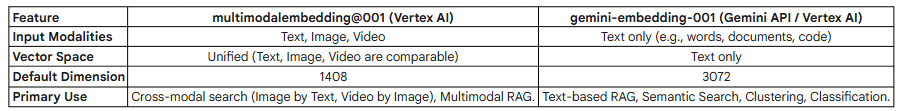

For Example:

Application Insight: If you are building an e-commerce catalog search where users can query for products using an image or a description, you must use a multimodal embedding model to create a shared semantic space for both input types.